<a href="https://colab.research.google.com/github/SalikFillah/Case-Study-03-Data-Mining_Kelompok-7/blob/main/Case_Study_03_Data_Mining_Kelompok_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


%matplotlib inline
plt.style.use('bmh'); sns.set()

In [ ]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/SalikFillah/Case-Study-03-Data-Mining_Kelompok-3/main/data%20cs%203.csv
df = pd.read_csv("data/data cs 3.csv", low_memory = False, encoding='utf8')
df.shape

mkdir: cannot create directory ‘data’: File exists
--2022-10-26 04:55:31--  https://raw.githubusercontent.com/SalikFillah/Case-Study-03-Data-Mining_Kelompok-3/main/data%20cs%203.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2167 (2.1K) [text/plain]
Saving to: ‘data/data cs 3.csv.2’

data cs 3.csv.2     100%[===================>]   2.12K  --.-KB/s    in 0s      

2022-10-26 04:55:31 (44.8 MB/s) - ‘data/data cs 3.csv.2’ saved [2167/2167]



(56, 7)

In [ ]:
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,7/1/2022,Mr. A,1.0,Roti,Sri Roti,2
1,1,7/1/2022,Mr. A,2.0,Air Minum,Aquos,1
2,1,7/1/2022,Mr. A,11.0,Mie Instan,Indomi,2
3,1,7/1/2022,Mr. A,12.0,Mie Instan,Mi Sedap,1
4,2,7/1/2022,Mr. B,2.0,Air Minum,Aquos,1


##Preprocessing

Sebelum melakukan preprocessing, kami akan melihat tipe data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID Transaksi  56 non-null     int64  
 1   Tanggal       56 non-null     object 
 2   Konsumen      56 non-null     object 
 3   ID Produk     56 non-null     float64
 4   Nama Produk   56 non-null     object 
 5   Merek         56 non-null     object 
 6   Jumlah        56 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ KB


Terlihat bahwa masih terdapat kesalahan dalam tipe data. Sehingga kami akan mengubah tipe data menjadi sebagai berikut.

In [ ]:
df['ID Produk'] = df['ID Produk'].astype('Int64')
df['Konsumen'] = df['Konsumen'].astype('category')
df['Nama Produk'] = df['Nama Produk'].astype('category')
df['Merek'] = df['Merek'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID Transaksi  56 non-null     int64   
 1   Tanggal       56 non-null     object  
 2   Konsumen      56 non-null     category
 3   ID Produk     56 non-null     Int64   
 4   Nama Produk   56 non-null     category
 5   Merek         56 non-null     category
 6   Jumlah        56 non-null     int64   
dtypes: Int64(1), category(3), int64(2), object(1)
memory usage: 3.2+ KB


Selanjutnya akan diperiksa missing values dari data.

In [ ]:
df.isnull().sum()

ID Transaksi    0
Tanggal         0
Konsumen        0
ID Produk       0
Nama Produk     0
Merek           0
Jumlah          0
dtype: int64

Terlihat bahwa tidak terdapat missing values pada data.

Selanjutnya kami akan melihat frekuensi pembelian produk pada setiap konsumen.

In [ ]:
df2 = pd.crosstab(df.Konsumen, df.Konsumen).sum()
print(df2)

Konsumen
Mr. A     6
Mr. B    15
Mr. C     3
Mr. D     3
Mr. F     1
Mr. G     4
Mr. J     1
Mr. P     2
Mr. T     3
Mr. X    13
Mr. Z     2
Mr.Y      3
dtype: int64


Terlihat bahwa Mr. X dan Mr. B memiliki pembelian produk terbanyak di AlfaIndo Ciputat, sehingga kami akan menggunakan sampel dari kedua konsumen tersebut.

In [ ]:
basket = df[(df['Konsumen'] == 'Mr. X') | (df['Konsumen'] == 'Mr. B')]

In [ ]:
# Group the transaction
basket = basket.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket.head()

4     1
5     2
6     1
7     1
11    2
12    2
13    3
14    1
15    2
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
42    1
43    2
44    1
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
2,1,0,0,1,0,1,2
4,2,2,0,2,1,0,3
8,0,3,0,0,1,1,1
9,1,2,1,2,1,0,2
13,1,0,0,1,0,0,2


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
2,1,0,0,1,0,1,1
4,1,1,0,1,1,0,1
8,0,1,0,0,1,1,1
9,1,1,1,1,1,0,1
13,1,0,0,1,0,0,1


In [ ]:
basket_sets.columns

Index(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo',
       'Snack'],
      dtype='object', name='Nama Produk')

In [ ]:
basket_sets.index

Int64Index([2, 4, 8, 9, 13, 17, 18], dtype='int64', name='ID Transaksi')

In [ ]:
basket_sets.iloc[0]

Nama Produk
Air Minum     1
Mie Instan    0
Rokok         0
Roti          1
Sabun         0
Shampoo       1
Snack         1
Name: 2, dtype: int64

In [ ]:
basket_sets.iloc[0].sum()

4

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
0,0.857143,(Air Minum)
9,0.857143,"(Air Minum, Roti)"
3,0.857143,(Roti)
6,0.857143,(Snack)
36,0.714286,"(Air Minum, Roti, Snack)"
...,...,...
44,0.142857,"(Mie Instan, Shampoo, Sabun)"
46,0.142857,"(Snack, Mie Instan, Shampoo)"
47,0.142857,"(Roti, Rokok, Sabun)"
48,0.142857,"(Roti, Snack, Rokok)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
448,"(Air Minum, Mie Instan)",(Rokok),0.285714,0.142857,0.142857,0.50,3.50,0.102041,1.714286
261,"(Air Minum, Mie Instan)","(Roti, Snack, Rokok)",0.285714,0.142857,0.142857,0.50,3.50,0.102041,1.714286
136,"(Snack, Rokok)","(Roti, Mie Instan)",0.142857,0.285714,0.142857,1.00,3.50,0.102041,inf
237,"(Rokok, Sabun)","(Air Minum, Snack, Mie Instan)",0.142857,0.285714,0.142857,1.00,3.50,0.102041,inf
133,"(Roti, Mie Instan)","(Snack, Rokok)",0.285714,0.142857,0.142857,0.50,3.50,0.102041,1.714286
...,...,...,...,...,...,...,...,...,...
28,"(Air Minum, Snack)",(Sabun),0.714286,0.571429,0.428571,0.60,1.05,0.020408,1.071429
8,"(Roti, Snack)",(Sabun),0.714286,0.571429,0.428571,0.60,1.05,0.020408,1.071429
31,(Sabun),"(Air Minum, Snack)",0.571429,0.714286,0.428571,0.75,1.05,0.020408,1.142857
23,(Sabun),"(Air Minum, Roti, Snack)",0.571429,0.714286,0.428571,0.75,1.05,0.020408,1.142857


In [ ]:
rules.sort_values(by='support', ascending=False, na_position='last', inplace = True)
rules.head(7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Roti),(Air Minum),0.857143,0.857143,0.857143,1.000000,1.166667,0.122449,inf
0,(Air Minum),(Roti),0.857143,0.857143,0.857143,1.000000,1.166667,0.122449,inf
2,"(Air Minum, Snack)",(Roti),0.714286,0.857143,0.714286,1.000000,1.166667,0.102041,inf
3,"(Roti, Snack)",(Air Minum),0.714286,0.857143,0.714286,1.000000,1.166667,0.102041,inf
5,(Roti),"(Air Minum, Snack)",0.857143,0.714286,0.714286,0.833333,1.166667,0.102041,1.714286
4,(Air Minum),"(Roti, Snack)",0.857143,0.714286,0.714286,0.833333,1.166667,0.102041,1.714286
7,(Sabun),(Snack),0.571429,0.857143,0.571429,1.000000,1.166667,0.081633,inf


In [ ]:
rules.sort_values(by='support', ascending=True, na_position='last', inplace = True)
rules.head(7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,"(Air Minum, Roti)","(Rokok, Mie Instan, Sabun)",0.857143,0.142857,0.142857,0.166667,1.166667,0.020408,1.028571
333,"(Roti, Snack, Mie Instan, Sabun)",(Rokok),0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
551,"(Air Minum, Roti, Mie Instan, Sabun)","(Snack, Rokok)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
186,"(Air Minum, Mie Instan, Sabun)",(Rokok),0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
338,"(Roti, Snack, Mie Instan)","(Rokok, Sabun)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286
554,"(Roti, Snack, Rokok, Sabun)","(Air Minum, Mie Instan)",0.142857,0.285714,0.142857,1.000000,3.500000,0.102041,inf
344,"(Roti, Mie Instan, Sabun)","(Snack, Rokok)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286


Berdasarkan output di atas dapat ditarik kesimpulan bahwa produk-produk yang dibeli secara bersamaaan oleh customer di alfaindo, yaitu {Roti, Air Minum}, {Roti, Snack, Air Minum}, {Snack, Sabun} dan produk yang jarang dibeli bersamaan, yaitu {Rokok, Air Minum, Roti, Snack, Sabun}, secara umum Rokok jarang dibeli bersamaan dengan produk lain

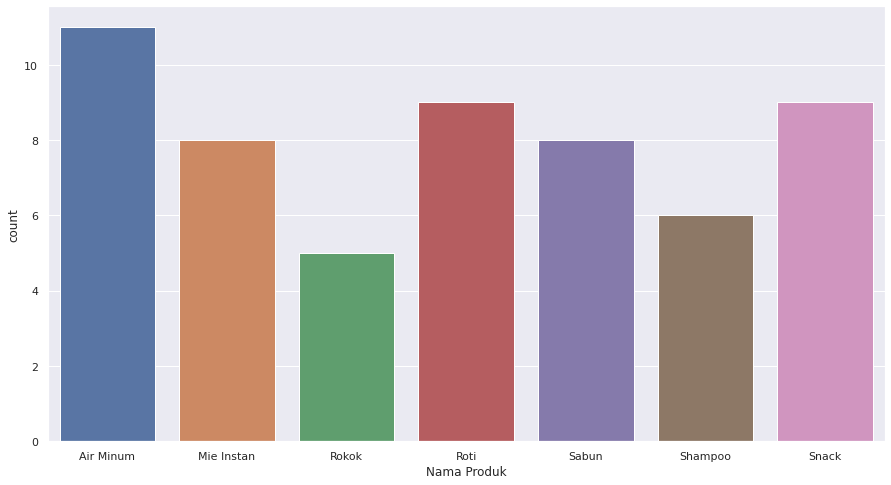

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Nama Produk')

Frekuensi pembelian tertinggi yaitu pada produk air minum sedangkan yang terendah adalah rokok

Insight :
1.   berdasarkan output yang diperoleh karena tingkat pembelian pada produk rokok rendah disarankan untuk penempatan produk rokok diletakkan di dekat kasir agar mudah terlihat oleh pembeli.
2.   Karena produk yang jarang dibeli bersamaan, yaitu {Rokok, Air Minum, Roti, Snack, Sabun} disarankan membuat paket hemat sembako.
3. Karena tingkat pembelian pada produk air minum tinggi maka disarankan untuk menambah varian air minum seperti kopi, karena kecenderungan orang indonesia merokok bersamaan dengan minum kopi maka disarankan untuk membuat promo bundling kopi dengan rokok (cross-selling).
4. Karena nilai peluang produk air minum dan roti dibeli secara bersamaan tinggi maka disarankan untuk membuat tata letak kedua produk tersebut berjauhan sehingga konsumen dapat melihat produk lain.
5. Karena frekuensi pembelian produk sabun dan shampoo rendah maka disarankan untuk membuat paket bundling mandi.
6. Untuk memaksimalkan penjualan mi instan dapat disarankan memberi saos sachet gratis setiap pembelian 1 mi instan.

